# LAB 4 - MỘT SỐ THUẬT TOÁN CƠ BẢN CỦA HỌC MÁY

##### 1. LINEAR REGERSSIONREGERSSION
##### Biết : HỒI QUI TUYẾN TÍNH LÀ DỰ ĐOÁN GIÁ TRỊ LIÊN TỤC DỰA TRÊN MỘT HOẶC NHIỀU BIẾN ĐỘC LẬP


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

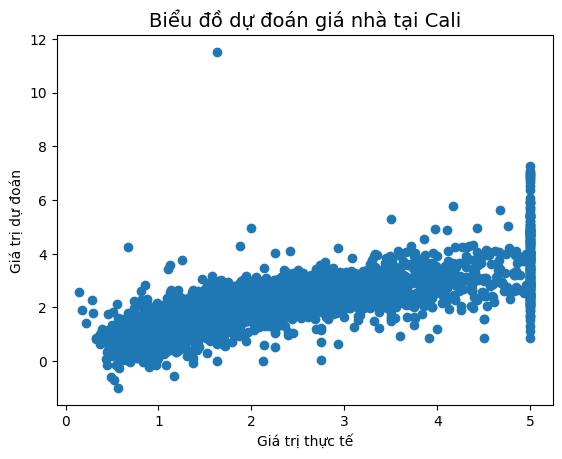

In [19]:
cali = fetch_california_housing()
x = pd.DataFrame(cali.data , columns=cali.feature_names)
y = pd.Series(cali.target)
#Chia tập dữ liệu có 80% huấn luyện và 20% kiểm tra
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)
#Xây dựng và huấn luyện mô hình
model = LinearRegression()
model.fit(X_train,Y_train)
#Dự đoán và đánh giá
y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test,y_pred)
r2 = r2_score(Y_test,y_pred)
# Vẽ đồ thị so sánh giữa giá trị thực tế và giá trị dự đoán
plt.scatter(Y_test,y_pred)
plt.title('Biểu đồ dự đoán giá nhà tại Cali', fontsize=14)
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')


# Hiển thị đồ thị
plt.show()


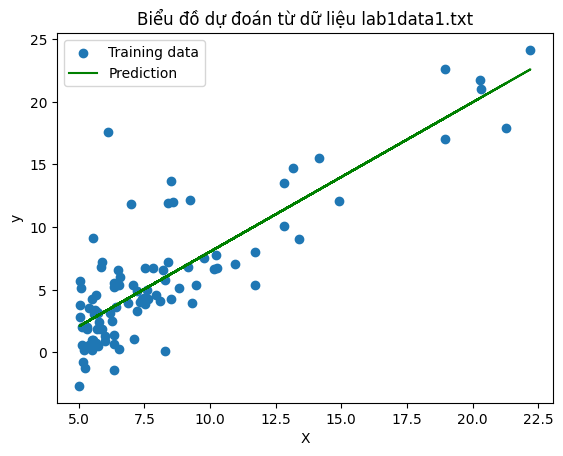

In [ ]:

data = np.loadtxt('lab1data1.txt', delimiter=',')
X = data[:, 0]
y = data[:, 1]


X = np.c_[np.ones(X.shape[0]), X]


theta = np.linalg.inv(X.T @ X) @ X.T @ y


plt.scatter(X[:, 1], y, label='Training data')
plt.plot(X[:, 1], X @ theta, color='green', label='Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title("Biểu đồ dự đoán từ dữ liệu lab1data1.txt")
plt.show()


##### 2. Hồi quy logistic
##### Phân loại nhị phân hoặc đa lớp dựa trên các đặc trưng

Số mẫu trong tập huấn luyện: 16512
Số mẫu trong tập kiểm tra: 4128
Độ chính xác của mô hình: 93.71%
Độ chính xác của mô hình: 93.71%

Báo cáo chi tiết:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        54
           1       0.97      0.93      0.95        89

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143


Ma trận nhầm lẫn:
[[51  3]
 [ 6 83]]


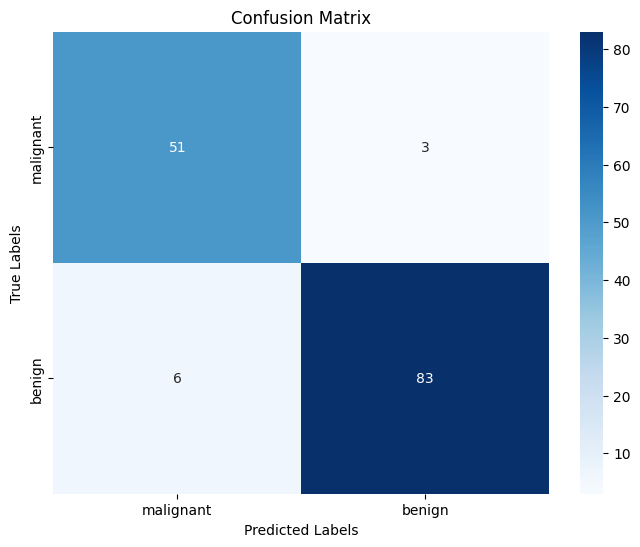

KeyError: 'mean radius'

<Figure size 1000x600 with 0 Axes>

In [36]:
# Xây dựng mô hình LG để phân loại nhị phân trong dữ liệu breast Cancer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# load data
data = load_breast_cancer()
x = data.data
y = data.target

# Chia tập dữ liệu thành tập huấn luyện (75%) và tập kiểm tra
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print(f'Số mẫu trong tập huấn luyện: {X_train.shape[0]}')
print(f'Số mẫu trong tập kiểm tra: {X_test.shape[0]}')

# Xây dựng và huấn luyện mô hình
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Độ chính xác của mô hình: {accuracy * 100:.2f}%')

# Dự đoán và đánh giá
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Độ chính xác của mô hình: {accuracy * 100:.2f}%')
print("\nBáo cáo chi tiết:")
print(classification_report(y_test, y_pred))
print("\nMa trận nhầm lẫn:")
print(confusion_matrix(y_test, y_pred))


# Vẽ ma trận nhầm lẫn
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
## Trực quan hóa dữ liệu
# Biểu đò phân bố 
plt.figure(figsize=(10, 6))
sns.histplot(data['mean radius'], kde=True, bins=30)
plt.title('Phân bố của Mean Radius')
plt.xlabel('Mean Radius')
plt.ylabel('Tần số')
plt.show()
# Biểu đồ tương quan
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan')
plt.show()
# Biểu đồ cặp
sns.pairplot(data, vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area'], hue='target')
plt.title('Biểu đồ cặp')
plt.show()

# Phân cực 
from textblob import TextBlob

# Một số câu văn bản
texts = ["Tôi rất thích sản phẩm này!", "Dịch vụ thật tệ.", "Tôi cảm thấy bình thường về điều này."]

# Phân tích tính phân cực
for text in texts:
    analysis = TextBlob(text)
    print(f'Văn bản: "{text}" - Tính phân cực: {analysis.sentiment.polarity}')
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử `data` là DataFrame của bạn và `feature` là cột bạn muốn phân tích
plt.figure(figsize=(10, 6))
sns.histplot(data['feature'], kde=True, bins=30)
plt.title('Phân phối của Feature')
plt.xlabel('Feature')
plt.ylabel('Tần số')
plt.show()

# Nhóm các đối tượng có đặc điểm tương đồng mà không gán nhãn